#Plot bike-share data with Matplotlib

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
weather = pd.read_table('daily_weather.tsv')
usage = pd.read_table('usage_2012.tsv')
stations = pd.read_table('stations.tsv')

In [4]:
newseasons = {'Summer': 'Spring', 'Spring': 'Winter', 'Fall': 'Summer', 'Winter': 'Fall'}
weather['season_desc'] = weather['season_desc'].map(newseasons)
weather['Day'] = pd.DatetimeIndex(weather.date).date
weather['Month'] = pd.DatetimeIndex(weather.date).month

#Question 1: Plot Daily Temp of 2012

###Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

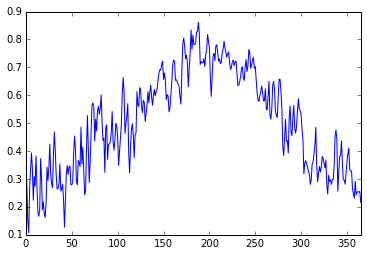

In [5]:
weather['temp'].plot()
# weather.plot(kind='line', y='temp', x='Day')
plt.show()

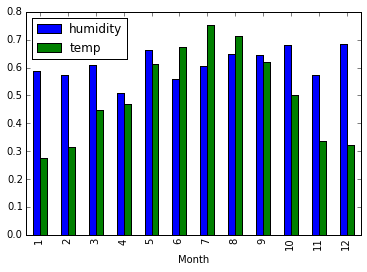

In [6]:
weather[['Month', 'humidity', 'temp']].groupby('Month').aggregate(np.mean).plot(kind='bar')
plt.show()

#Question 2: Rental Volumes compared to Temp

###Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

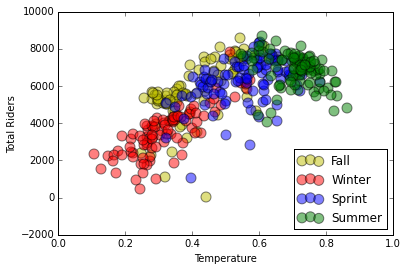

In [7]:
w = weather[['season_desc', 'temp', 'total_riders']]
w_fal = w.loc[w['season_desc'] == 'Fall']
w_win = w.loc[w['season_desc'] == 'Winter']
w_spr = w.loc[w['season_desc'] == 'Spring']
w_sum = w.loc[w['season_desc'] == 'Summer']

plt.scatter(w_fal['temp'], w_fal['total_riders'], c='y', label='Fall', s=100, alpha=.5)
plt.scatter(w_win['temp'], w_win['total_riders'], c='r', label='Winter', s=100, alpha=.5)
plt.scatter(w_spr['temp'], w_spr['total_riders'], c='b', label='Sprint', s=100, alpha=.5)
plt.scatter(w_sum['temp'], w_sum['total_riders'], c='g', label='Summer', s=100, alpha=.5)

plt.legend(loc='lower right')
plt.xlabel('Temperature')
plt.ylabel('Total Riders')
plt.show()

#Question 3: Daily Rentals compared to Windspeed

###Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

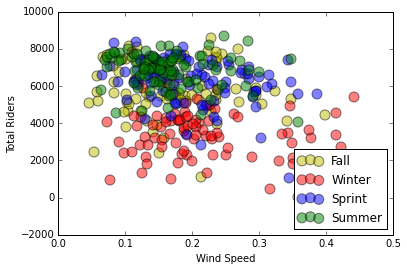

In [8]:
w = weather[['season_desc', 'windspeed', 'total_riders']]
w_fal = w.loc[w['season_desc'] == 'Fall']
w_win = w.loc[w['season_desc'] == 'Winter']
w_spr = w.loc[w['season_desc'] == 'Spring']
w_sum = w.loc[w['season_desc'] == 'Summer']

plt.scatter(w_fal['windspeed'], w_fal['total_riders'], c='y', label='Fall', s=100, alpha=.5)
plt.scatter(w_win['windspeed'], w_win['total_riders'], c='r', label='Winter', s=100, alpha=.5)
plt.scatter(w_spr['windspeed'], w_spr['total_riders'], c='b', label='Sprint', s=100, alpha=.5)
plt.scatter(w_sum['windspeed'], w_sum['total_riders'], c='g', label='Summer', s=100, alpha=.5)

plt.legend(loc='lower right')
plt.xlabel('Wind Speed')
plt.ylabel('Total Riders')
plt.show()

#Question 4: Rental Volumes by Geographical Location

###How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.

In [12]:
s = stations[['station','lat','long']]
u = pd.concat([usage['station_start']], axis=1, keys=['station'])
counts = u['station'].value_counts()
c = DataFrame(counts.index, columns=['station'])
c['counts'] = counts.values
m = pd.merge(s, c, on='station')

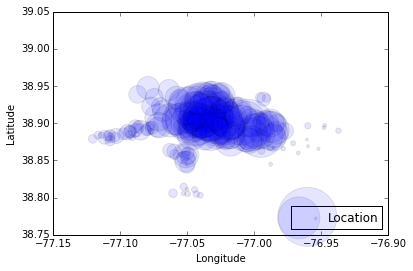

In [17]:
plt.scatter(m['long'], m['lat'], c='b', label='Location', s=(m['counts'] * .05), alpha=.1)

plt.legend(loc='lower right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()